# Churn Prediction For Bank Customer

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf                                              
import matplotlib.pyplot as plt               
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
import plotly.offline 
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

**Data Dictionary**

RowNumber       
CustomerId     
Surname          
CreditScore      
Geography        
Gender           
Age              
Tenure           
Balance          
NumOfProducts     
HasCrCard        
IsActiveMember   
EstimatedSalary  
Exited      

## Indest Data

In [313]:
df= pd.read_csv("Churn_Modelling.csv")

In [314]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6172,6173,15656822,Day,568,Germany,Male,43,5,87612.64,4,1,1,107155.40,1
9901,9902,15802909,Hu,706,Germany,Female,56,3,139603.22,1,1,1,86383.61,0
2756,2757,15765806,Wu,492,France,Male,29,1,144591.96,1,1,1,196293.76,0
9471,9472,15776404,Williamson,523,France,Male,22,8,123374.46,1,1,1,124906.59,0
8847,8848,15630244,Chu,457,France,Male,40,10,134320.23,2,1,0,150757.35,0


In [315]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [316]:
df.shape

(10000, 14)

In [317]:
df["Exited"].value_counts()
#Şirketten ayrılıp ayrılmadıklarını gösterir. Target sutundur.

0    7963
1    2037
Name: Exited, dtype: int64

In [318]:
df["Exited"].value_counts().iplot(kind="bar")

Imbalanced bir dataya sahibiz. Accuracy score kullanmamalıyız. False negative sayısını olabildiğince düşürmek istediğimiz için Recall metriğini kullanacağız.

In [319]:
df=df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)
df

In [320]:
df.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [226]:
df.shape

(10000, 14)

In [266]:
df.groupby("Geography")["Exited"].value_counts(normalize=True)

Geography  Exited
France     0         0.838452
           1         0.161548
Germany    0         0.675568
           1         0.324432
Spain      0         0.833266
           1         0.166734
Name: Exited, dtype: float64

In [267]:
df.groupby("Geography")["Exited"].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [227]:
df[["Geography","Gender"]]

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [268]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [269]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [270]:
df.duplicated().sum()

0

In [231]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [232]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [233]:
num_cols = ['CreditScore','Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [234]:
cat_cols =(['Geography', 'Gender'])

In [235]:
cat_cols

['Geography', 'Gender']

In [236]:
num_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [237]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


<AxesSubplot:>

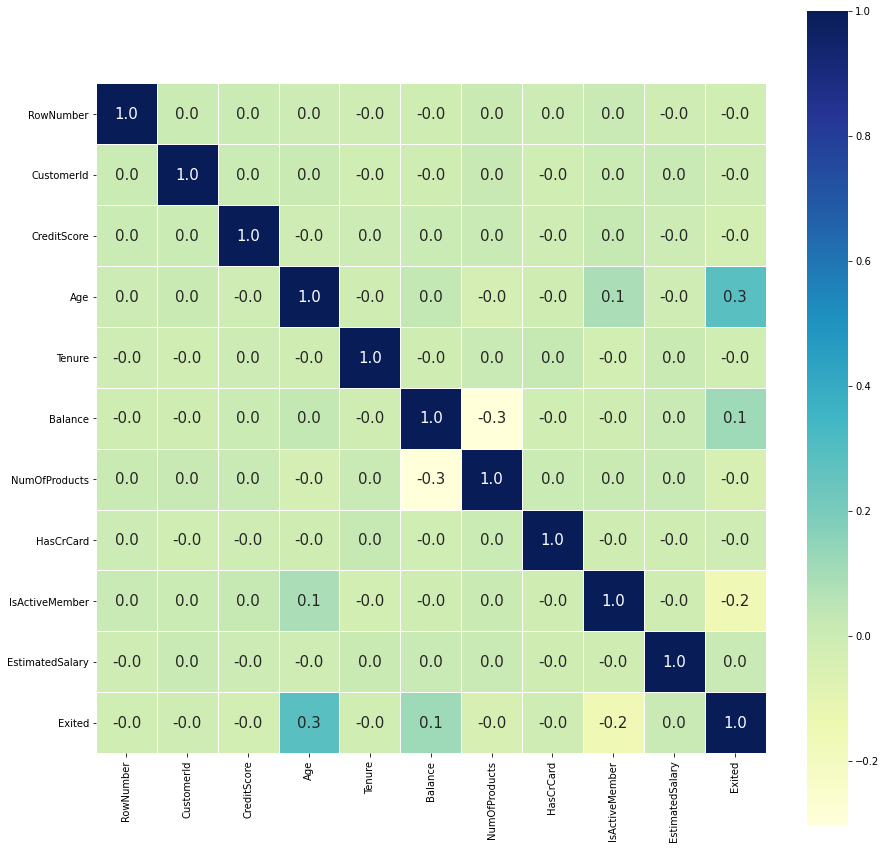

In [276]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu',linewidths=.5)

In [277]:
df_select_encod

Exited  RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0          1          1    15634602          619   42       2       0.00   
1          0          2    15647311          608   41       1   83807.86   
2          1          3    15619304          502   42       8  159660.80   
3          0          4    15701354          699   39       1       0.00   
4          0          5    15737888          850   43       2  125510.82   
...      ...        ...         ...          ...  ...     ...        ...   
9995       0       9996    15606229          771   39       5       0.00   
9996       0       9997    15569892          516   35      10   57369.61   
9997       1       9998    15584532          709   36       7       0.00   
9998       1       9999    15682355          772   42       3   75075.31   
9999       0      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0                 1          1               1        101348.88   
1                 1          0               1        112542.58   
2                 3          1               0        113931.57   
3                 2          0               0         93826.63   
4                 1          1               1         79084.10   
...             ...        ...             ...              ...   
9995              2          1               0         96270.64   
9996              1          1               1        101699.77   
9997              1          0               1         42085.58   
9998              2          1               0         92888.52   
9999              1          1               0         38190.78   

      Surname_Abazu  Surname_Abbie  Surname_Abbott  Surname_Abdullah  \
0                 0              0               0                 0   
1                 0              0               0                 0   
2                 0              0               0                 0   
3                 0              0               0                 0   
4                 0              0               0                 0   
...             ...            ...             ...               ...   
9995              0              0               0                 0   
9996              0              0               0                 0   
9997              0              0               0                 0   
9998              0              0               0                 0   
9999              0              0               0                 0   

      Surname_Abdulov  Surname_Abel  Surname_Abernathy  Surname_Abramov  \
0                   0             0                  0                0   
1                   0             0                  0                0   
2                   0             0                  0                0   
3                   0             0                  0                0   
4                   0             0                  0                0   
...               ...           ...                ...              ...   
9995                0             0                  0                0   
9996                0             0                  0                0   
9997                0             0                  0                0   
9998                0             0                  0                0   
9999                0             0                  0                0   

      Surname_Abramova  Surname_Abramovich  Surname_Abramowitz  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   
...                ...                 ...                 ...   
9995                 0                   0                  

In [278]:
# We choose the features that affect exited  
#  First method
df_select = df.loc[:,['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
df_select

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

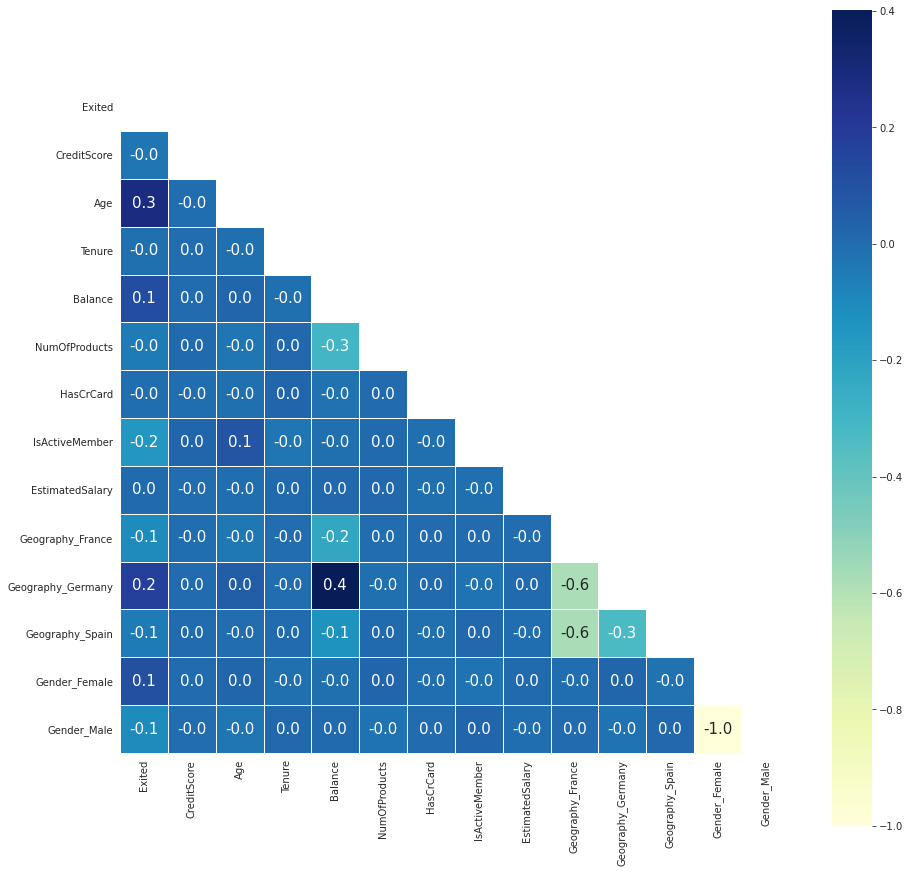

In [244]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu',linewidths=.5,mask = mask)

In [250]:
# crosstab between Age and exited
pd.crosstab(df_select.Age,df_select.Exited,normalize = "index"  )

Exited,0,1
Age,,
18,0.909091,0.090909
19,0.962963,0.037037
20,0.950000,0.050000
21,0.943396,0.056604
22,0.857143,0.142857
...,...,...
83,1.000000,0.000000
84,0.500000,0.500000
85,1.000000,0.000000


In [108]:
# crosstab between Gender and exited
pd.crosstab(df_select.Gender,df_select.Exited,normalize = "index"  )

Exited,0,1
Gender,,
Female,0.749285,0.250715
Male,0.835441,0.164559


In [251]:
# crosstab between Geography and exited
pd.crosstab(df_select.Geography,df_select.Exited,normalize = "index"  )

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734


In [110]:
# crosstab between IsActiveMember and exited
pd.crosstab(df_select.IsActiveMember,df_select.Exited,normalize = "index"  )

Exited,0,1
IsActiveMember,,
0,0.731491,0.268509
1,0.857309,0.142691


In [111]:
# crosstab between Balance and exited
pd.crosstab(df_select.Balance,df_select.Exited,normalize = "index"  )

Exited,0,1
Balance,,
0.00,0.861764,0.138236
3768.69,0.000000,1.000000
12459.19,0.000000,1.000000
14262.80,1.000000,0.000000
16893.59,1.000000,0.000000
...,...,...
216109.88,0.000000,1.000000
221532.80,1.000000,0.000000
222267.63,0.000000,1.000000


In [112]:
print('seaborn: %s' % sns.__version__)

seaborn: 0.11.0


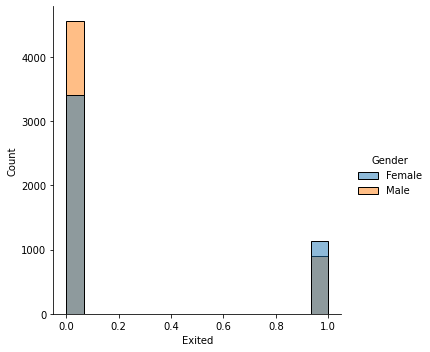

In [252]:
# number of total Servived sex
sns.displot(data=df_select, x="Exited",hue='Gender') 

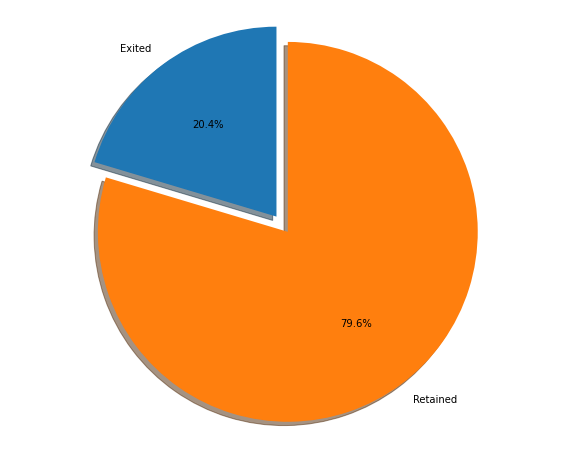

In [253]:
labels = 'Exited', 'Retained'
sizes = [df_select.Exited[df_select['Exited']==1].count(), df_select.Exited[df_select['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("", size = 20)
plt.show()

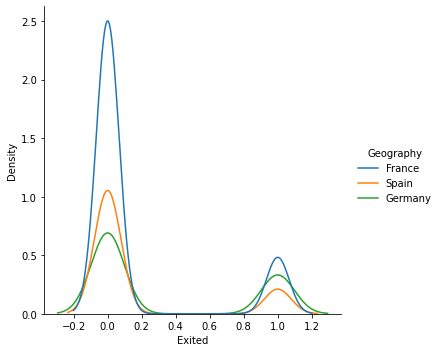

In [254]:
sns.displot(data=df_select, x="Exited",hue='Geography',kind ='kde')

<AxesSubplot:xlabel='Geography', ylabel='count'>

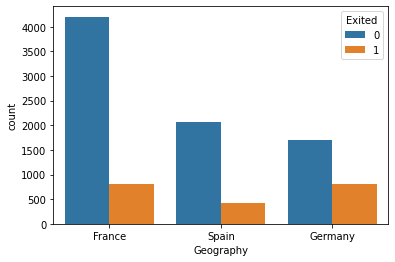

In [255]:
sns.countplot(data=df_select, x="Geography",hue='Exited')

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

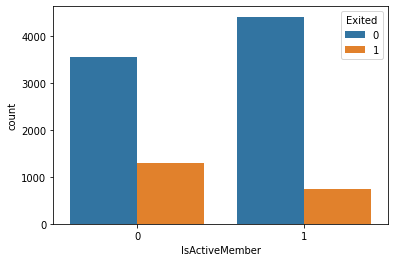

In [256]:
sns.countplot(data=df_select, x="IsActiveMember",hue='Exited')

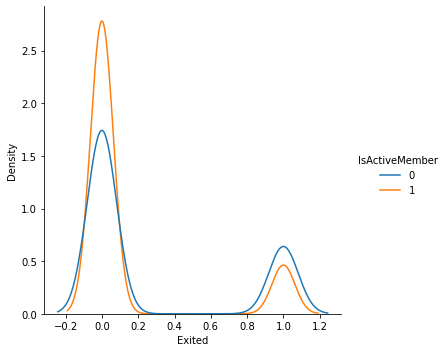

In [257]:
sns.displot(data=df_select, x="Exited",hue='IsActiveMember',kind ='kde') 

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

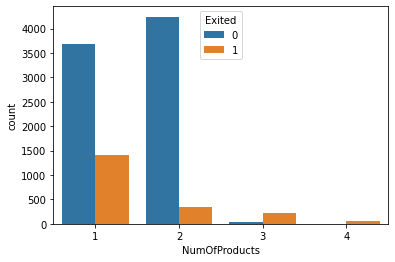

In [258]:
sns.countplot(data=df_select, x="NumOfProducts",hue='Exited')

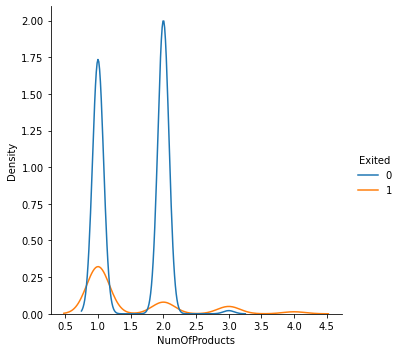

In [259]:
sns.displot(data=df_select, x="NumOfProducts",hue='Exited',kind ='kde') 

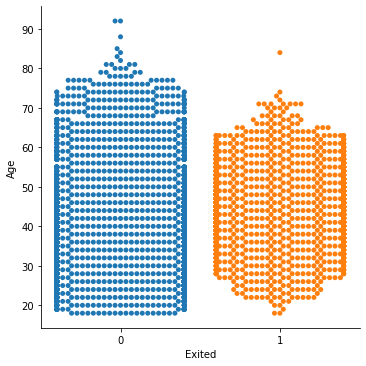

In [260]:
sns.catplot(x="Exited", y="Age", data=df_select,kind="swarm")

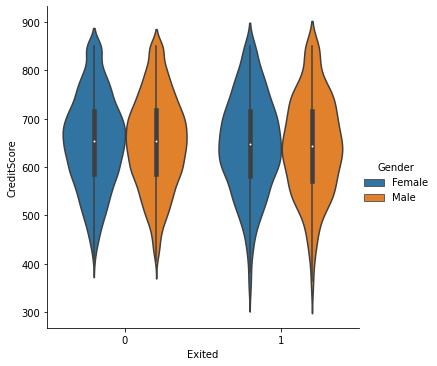

In [261]:
sns.catplot(x="Exited", y="CreditScore",hue = 'Gender', data=df_select,kind="violin")

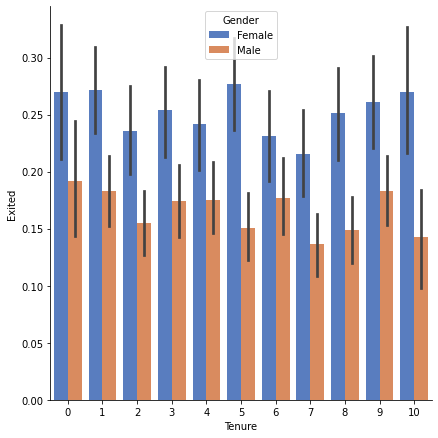

In [262]:
sns.factorplot("Tenure", "Exited", "Gender",data=df_select, kind="bar",size=6, palette="muted",legend_out=False)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

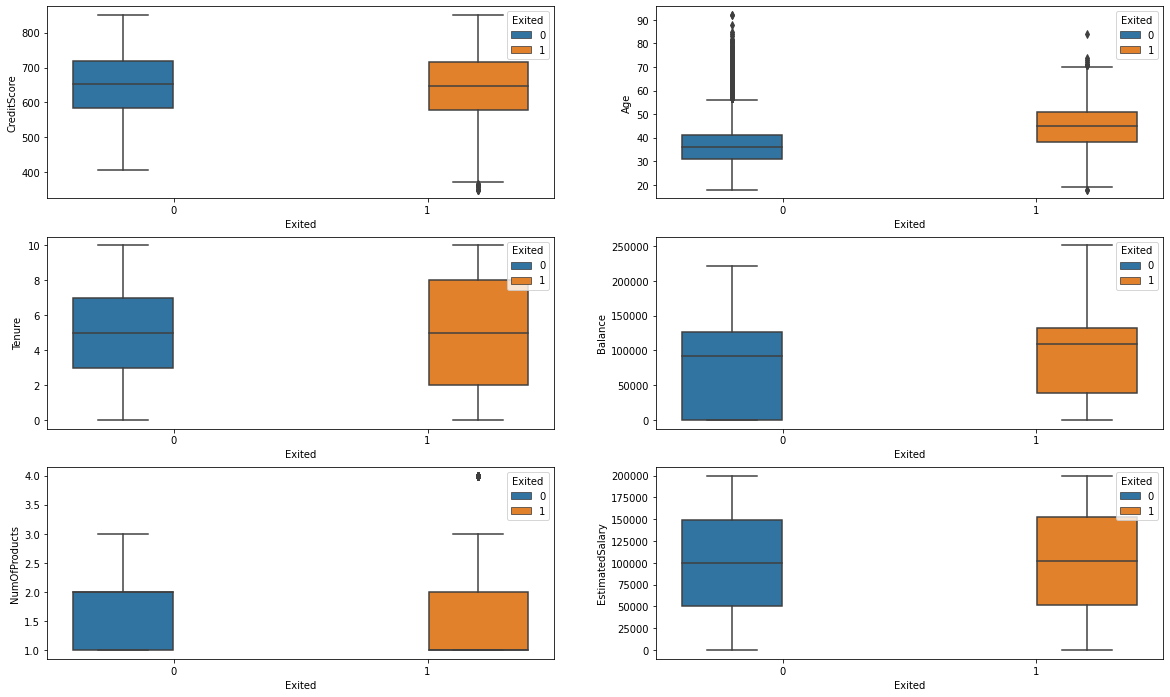

In [263]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df_select, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df_select , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df_select, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df_select, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df_select, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df_select, ax=axarr[2][1])

In [264]:
# relationship 
sns.relplot(x="Age", y="Exited", data=churn_select)

NameError: name 'churn_select' is not defined

In [ ]:
sns.relplot(x="NumOfProducts", y="Exited", data=churn_select)

In [ ]:
sns.relplot(x="Balance", y="Exited", data=churn_select)

## Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split

In [294]:
X = df_select.drop(['Exited'],axis = 1)
y = df_select['Exited']

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [296]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9000, 10)
(9000,)
(1000, 10)
(1000,)


In [297]:
from sklearn.preprocessing import MinMaxScaler  # RobustScaler()

# If there are too many outliers in the data, robust scaler should be used, otherwise minmax can be used.

In [298]:
scaler = MinMaxScaler()

In [299]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'France'

In [ ]:
y_train.value_counts(normalize=True)

In [192]:
y_test.value_counts(normalize=True)

0    0.8
1    0.2
Name: Exited, dtype: float64

## Modelling & Model Performance

### Import related libraries

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, recall_score, classification_report, roc_auc_score, f1_score

Base Models

In [194]:
cat_cols

['Geography', 'Gender']

In [195]:
ohe = OneHotEncoder(sparse=False, drop="if_binary")
new_df = ohe.fit_transform(df[cat_cols])
new_df = pd.DataFrame(new_df, columns=ohe.get_feature_names(df[cat_cols].columns))
new_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
9995,1.0,0.0,0.0,1.0
9996,1.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,0.0
9998,0.0,1.0,0.0,1.0


In [196]:
transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(drop="if_binary"), cat_cols)
], remainder="passthrough")

### Creating Model

### without class_weigth

#### StratifiedKFold


- 100 satır

    - 90 ---> 0 class
    - 10 ---> 1 class



- **10 fold cv**


    - First Fold
        - 0 ---> 6
        - 1 ---> 4

    - Second Fold
        - 0 ---> 10
        - 1 ---> 0
        

- **Stratified 10 fold cv**

    - First Fold
        - 0 ---> 9
        - 1 ---> 1

    - Second Fold
        - 0 ---> 9
        - 1 ---> 1

In [197]:
models = []

models.append(("LOG", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DTC", DecisionTreeClassifier()))
models.append(("SVC", SVC()))
models.append(("RFC", RandomForestClassifier()))
models.append(("ADA", AdaBoostClassifier()))
models.append(("GBC", GradientBoostingClassifier()))
# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []


for name, model in models:
    pipe = Pipeline([("transformer", transformer),
                     ("model", model)])
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {round(cv_results.mean(), 4)}")

    y_pred = pipe.fit(X_train, y_train).predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))
    
    

result_df = pd.DataFrame(results, columns=[i for i in range(1, 14)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall": recall_scores,
                        "ROC AUC": roc_auc_scores
                       }, index=names)

compare
for score in compare.columns:
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score")

<IPython.core.display.Javascript object>

LOG: 0.0371


<IPython.core.display.Javascript object>

KNN: 0.1028


<IPython.core.display.Javascript object>

DTC: 0.501


<IPython.core.display.Javascript object>

SVC: 0.0


<IPython.core.display.Javascript object>

RFC: 0.4484


<IPython.core.display.Javascript object>

ADA: 0.462


<IPython.core.display.Javascript object>

GBC: 0.4594


ValueError: 13 columns passed, passed data had 10 columns

#### Evaluate

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [ ]:
transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(drop="if_binary"), cat_cols)
], remainder="passthrough")

In [ ]:
models = []

models.append(("LOG", LogisticRegression(class_weight="balanced")))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DTC", DecisionTreeClassifier(class_weight="balanced")))
models.append(("SVC", SVC(class_weight="balanced")))
models.append(("RFC", RandomForestClassifier(class_weight="balanced")))
models.append(("ADA", AdaBoostClassifier()))
models.append(("GBC", GradientBoostingClassifier()))
# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []


for name, model in models:
    pipe = Pipeline([("transformer", transformer),
                     ("model", model)])
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {round(cv_results.mean(), 4)}")

    y_pred = pipe.fit(X_train, y_train).predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))
    
    

result_df = pd.DataFrame(results, columns=[i for i in range(1, 15)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall": recall_scores,
                        "ROC AUC": roc_auc_scores
                       }, index=names)

compare
for score in compare.columns:
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score")

# Standart_Scaler

In [ ]:
transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(drop="if_binary"), cat_cols),
    ("scaler", StandardScaler(), num_cols)
], remainder="passthrough")

In [ ]:

models = []

models.append(("LOG", LogisticRegression(class_weight="balanced")))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DTC", DecisionTreeClassifier(class_weight="balanced")))
models.append(("SVC", SVC(class_weight="balanced")))
models.append(("RFC", RandomForestClassifier(class_weight="balanced")))
models.append(("ADA", AdaBoostClassifier()))
models.append(("GBC", GradientBoostingClassifier()))
# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []


for name, model in models:
    pipe = Pipeline([("transformer", transformer),
                     ("model", model)])
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {round(cv_results.mean(), 4)}")

    y_pred = pipe.fit(X_train, y_train).predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))
    
    

result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall": recall_scores,
                        "ROC AUC": roc_auc_scores
                       }, index=names)

for score in compare.columns:
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score")

#### Evaluate

## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(drop="if_binary"), cat_cols),
    ("scaler", StandardScaler(), num_cols)
], remainder="passthrough")




pipe = Pipeline([("preprocess", transformer),
                 ("classifier", LogisticRegression(class_weight="balanced"))])


param_grid = {
    'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : [0.001,0.01,0.1,1,10,100,1000] }


kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
grid = GridSearchCV(pipe, param_grid=param_grid, cv=kfold, scoring="recall", verbose=1)

grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
y_pred = grid.predict(X_test)

comp_recall = []
comp_recall_name = []


comp_recall.append(recall_score(y_test, y_pred))
comp_recall_name.append("Logistic Regression")


print(classification_report(y_test, y_pred))

#### Evaluate

## Final Model and Model Deployment

**Cost-Sensitive Learning for Catboost, XGBoost, LightGBM**

CatBoost, XGBoost and LightGBM use scale_pos_weight hyperparameter to tune the training algorithm for the imbalanced data.

scale_pos_weight is 1 by default.

Both major class and minority class get the same weight.

When dealing with imbalanced data, story changes a bit.

scale_pos_weight gets the number of ( total number of examples in the majority class divided by the total number of examples in the minority class.)

For example, in our data;

Number of Non-churned customer: 5174
Number of Churned customer: 1869
scale_pos_weight should get 5174 / 1869 which is almost 3
By adjusting the weight, minority class gets 3 times more impact and 3 times more correction than errors made on the majority class.

Two important point,

by changing scale_pos_weight we can also see changes on the recall, accuracy, roc-auc, precision score
If we use extreme values for the scale_pos_weight, we can overfit the minority class and model could make worse predictions.

**Default Parameters**

In [ ]:
# Kullanacağımız modeller nan değerlerle çalışabiliyor.
# Medianla doldurduğumuz nan'ları tekrar np.nan haline getiriyoruz
​
​
df.loc[nan_index,"TotalCharges"] = np.nan
​
X = df.drop("Churn", axis=1)
y = df["Churn"]
​
​
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(drop="if_binary"), cat_cols)
], remainder="passthrough")

In [ ]:
models = []

models.append(("XGB", XGBClassifier(random_state=42, verbosity = 0)))
models.append(("LGB", LGBMClassifier(random_state=42)))
models.append(("CAT", CatBoostClassifier(random_state=42,verbose=0, 
                                         cat_features=cat_cols)))

# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []



for name, model in models:
    if name != "CAT":
        pipe = Pipeline([("transformer", transformer),
                         ("model", model)])
        kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
        cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        y_pred = pipe.fit(X_train, y_train).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Default")

    else:
        
        kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        
        y_pred = model.fit(X_train, y_train,cat_features=cat_cols).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Default")
    

result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall": recall_scores,
                        "ROC AUC": roc_auc_scores
                       }, index=names)

for score in compare.columns:
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score")
    
compare

# scale_pos_weight = 3

In [ ]:
transformer = ColumnTransformer([
    ("ohe", OneHotEncoder(drop="if_binary"), cat_cols)
], remainder="passthrough")

In [ ]:
models = []

models.append(("XGB", XGBClassifier(random_state=42, verbosity = 0, scale_pos_weight = 3)))
models.append(("LGB", LGBMClassifier(random_state=42, scale_pos_weight = 3)))
models.append(("CAT", CatBoostClassifier(random_state=42, verbose=0, 
                                         cat_features=cat_cols, scale_pos_weight = 3)))

# evaluate each model in turn

results = []
names = []
f1_scores = []
recall_scores = []
roc_auc_scores = []



for name, model in models:
    if name != "CAT":
        pipe = Pipeline([("transformer", transformer),
                         ("model", model)])
        kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
        cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        y_pred = pipe.fit(X_train, y_train).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Scale Post Weight 3")

    else:
        
        kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        
        y_pred = model.fit(X_train, y_train,cat_features=cat_cols).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Scale Pos Weight 3")
    

result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall": recall_scores,
                        "ROC AUC": roc_auc_scores
                       }, index=names)

for score in compare.columns:
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score")
    
compare

In [ ]:
pd.DataFrame(comp_recall, index=comp_recall_name, columns=["Recall"]).sort_values(by="Recall").iplot(kind="barh",
                                                                                                    title="Model Comparison")

In [212]:
from sklearn.preprocessing import MinMaxScaler

In [213]:
scaler = MinMaxScaler()

In [214]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'France'

# Deep Learning

In [288]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [289]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [290]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [284]:
X_train.shape

(7500, 10)

In [291]:
model = Sequential()

model.add(Dense(19, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [292]:
model.weights

[<tf.Variable 'dense_11/kernel:0' shape=(10, 19) dtype=float32, numpy=
 array([[-0.32357508,  0.09821236, -0.15156406, -0.22254618, -0.44206354,
          0.19331062,  0.24062634, -0.3613428 , -0.13901317, -0.15739772,
         -0.23708357, -0.09037316, -0.02981147,  0.1109634 , -0.36610717,
          0.2820478 ,  0.44412827,  0.4169854 , -0.03896037],
        [ 0.20271331,  0.39078563,  0.28007472, -0.28015453, -0.10960588,
         -0.28829637, -0.3752564 ,  0.45134538, -0.25907442, -0.17854357,
         -0.41030335, -0.22496085,  0.29454142,  0.09971857, -0.08965296,
          0.25381607,  0.04663008, -0.1067906 , -0.18252942],
        [-0.17966413,  0.1975035 , -0.07985297, -0.06290597,  0.04011413,
          0.02566156,  0.35174805,  0.4355666 ,  0.45008534, -0.27625978,
         -0.1418572 , -0.31880203, -0.05828756, -0.18045276,  0.11882037,
         -0.45076442,  0.44887137,  0.16892332, -0.42864943],
        [-0.44861794,  0.33012527, -0.34902364,  0.280393  ,  0.15736443,
   

In [293]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
model.summary()

In [ ]:
model.weights

In [ ]:
model.history.history

In [ ]:
pd.DataFrame(model.history.history)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

In [208]:
from tensorflow.keras.callbacks import EarlyStopping

In [209]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)  # epoch 10 olunca patience 2 yaptık.
# erken durdur                val_los u görünüle sabır sayısı 2 olsun

In [210]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test),callbacks=[early_stop])
#  validation_data=(X_test,Y_test) test datasının tamamı verildi, calbackearly olunca yazdık

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [211]:
model.metrics_names

[]

In [ ]:
model.history.history

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch");

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch");

In [ ]:
print(model.evaluate(X_test,Y_test,verbose=1))  # ilki loss ikincisi accuary

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# probabilities of each class
preds = model.predict(X_test)

In [ ]:
# The numpy.argmax() function returns indices of the max element of the array 
# in a particular axis.
predictions= np.argmax(preds, axis=1)

In [ ]:
predictions

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
print(confusion_matrix(y_test, predictions))

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Final Model and Model Deployment

In [ ]:
scaler = MinMaxScaler().fit(X)

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

### Prediction

In [ ]:
sample = [[998, 1000]]

In [ ]:
sample_scaled = scaler_fake_reg.transform(sample)

In [219]:
model_fake_reg.predict(sample_scaled)

NameError: name 'model_fake_reg' is not defined

In [ ]:
model.save("cnn-1.h5")